In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy

In [5]:
def periodic_boundary(index, max_value):
  # Ensures periodic boundary conditions are met.
  return (index + max_value) % max_value

def create_lattice(w, initial_config):
  # Creates the spin lattice with random spins of either +1 or -1
  if initial_config == "random": # Random spin case
    return np.random.choice([-1, 1], size=(w, w))
  elif initial_config == "uniform": # Uniform spin case
    return np.ones((w, w))

def calc_energy_change(lattice, x, y, beta_mu_H):
  # Evaluates the energy change of flipping a site for the no coupling case (J=0)
  spin = lattice[x, y]
  energy_change = 2 * spin * beta_mu_H
  return energy_change

def metropolis_step(lattice, beta_mu_H):
  # Carries out one Metropolis Monte Carlo step.
  for _ in range(w**2):
    x = np.random.randint(0, w)
    y = np.random.randint(0, w)

    delta_E = calc_energy_change(lattice, x, y, beta_mu_H)

    if delta_E < 0:
      lattice[x, y] *= -1 #flips the spin at that site
    elif np.random.rand() < np.exp(-beta_mu_H * delta_E):
      lattice[x, y] *= -1

  return lattice

<Figure size 640x480 with 0 Axes>

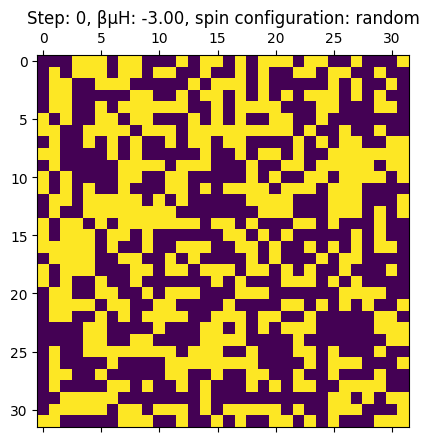

<Figure size 640x480 with 0 Axes>

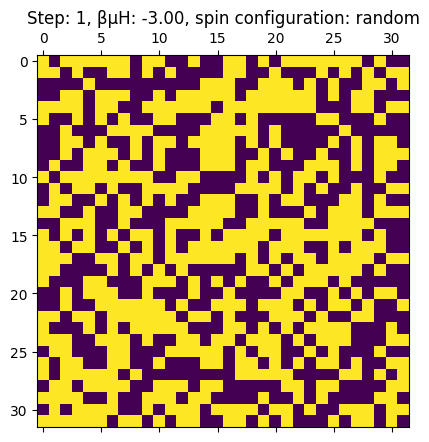

<Figure size 640x480 with 0 Axes>

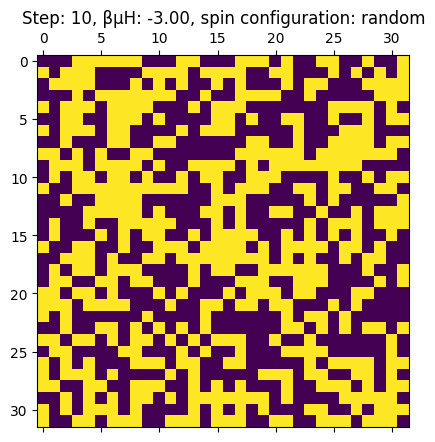

<Figure size 640x480 with 0 Axes>

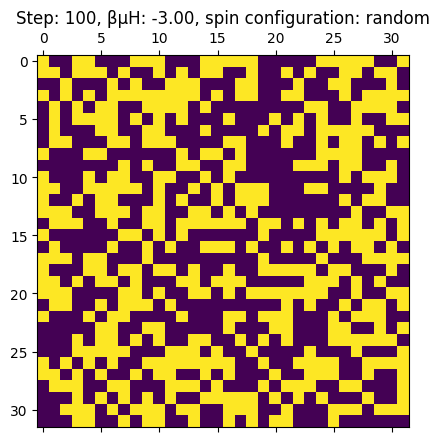

<Figure size 640x480 with 0 Axes>

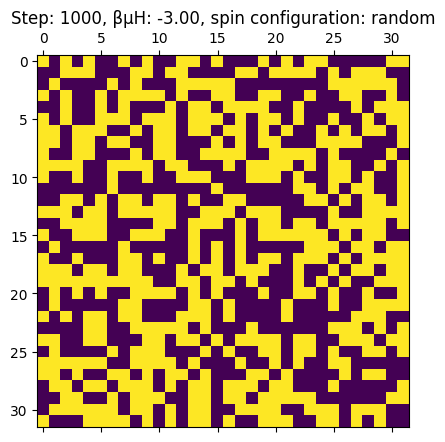

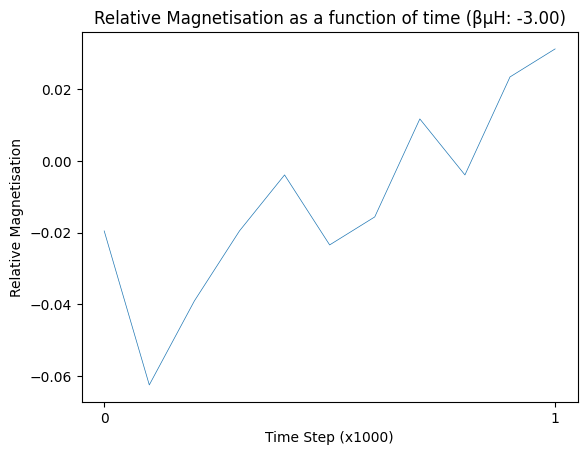

In [6]:
def calc_rel_mag(lattice):
  # Calculate the relative magnetisation
  tot_spin = np.sum(lattice)
  rel_mag = tot_spin / w**2
  return rel_mag

def lattice_plot(lattice, step, beta_mu_H, initial_config):
  # Plots the spin lattice.
  plt.figure()
  plt.matshow(lattice)
  plt.title(f"Step: {step}, \u03b2\u03bcH: {beta_mu_H:.2f}, spin configuration: {initial_config}")
  plt.show()

def rel_mag_plot(rel_mag_values, beta_mu_H):
  # Plot of relative magnetisation as a function of steps.
  x = np.arange(0, len(rel_mag_values) * 100, 100) / 1000 #Adding factor of 1000 to time step
  plt.figure()
  plt.plot(x, rel_mag_values, linewidth=0.5)
  plt.xlabel("Time Step (x1000)")
  plt.ylabel("Relative Magnetisation")
  plt.title(f"Relative Magnetisation as a function of time (\u03b2\u03bcH: {beta_mu_H:.2f})")

  # Only integer markers on x-axis
  fig = plt.gcf()
  fig.axes[0].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
  plt.show()

def start_sim(beta_mu_H, w, num_steps, initial_config):
  # Runs a simulation and calls the functios to plot the graphs
  lattice = create_lattice(w, initial_config)
  lattice_plot(lattice, 0, beta_mu_H, initial_config) # plots the initial state

  rel_mag_values = []
  for step in range(num_steps):
    metropolis_step(lattice, beta_mu_H)

    if step in [1, 10, 100, 1000, 10000]:
      lattice_plot(lattice, step, beta_mu_H, initial_config)

    if step % 100 == 0: # to plot magnetisation every 1000 steps
      rel_mag_values.append(calc_rel_mag(lattice))

  rel_mag_plot(rel_mag_values, beta_mu_H)

  return lattice

beta_mu_H_range = np.linspace(-3, 3, 1)
beta_J = 0
w = 32
num_steps = 1001
initial_config = "random" # Either random or uniform to choose the starting configuration of the lattice.

for beta_mu_H in beta_mu_H_range:
  start_sim(beta_mu_H, w, num_steps, initial_config)

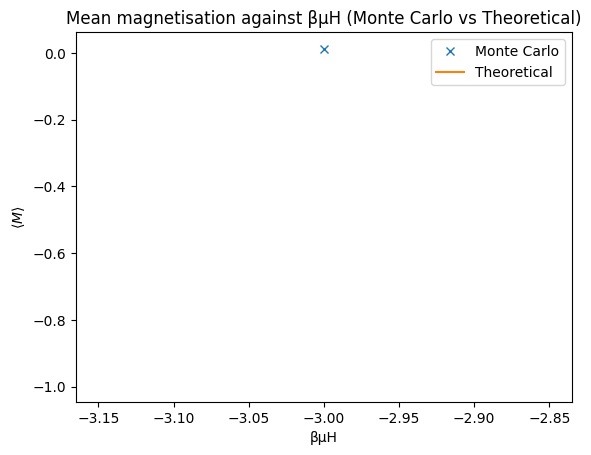

In [ ]:
# Below is for checking the average magnetisation against theoretical expectation
beta_mu_H_range = np.linspace(-3, 3, 20)
num_steps = 20000 # Chosen a higher number of steps to increase likelihood of reaching equilibrium
w = 32

# Create empty list to store the equilibrium values for magnetisation and the theoretical values
final_rel_mag_values = []
expected_rel_mag_values = []

for beta_mu_H in beta_mu_H_range:
  lattice = create_lattice(w, "random")

  for step in range(num_steps):
    metropolis_step(lattice, beta_mu_H)

  final_rel_mag = calc_rel_mag(lattice)
  final_rel_mag_values.append(final_rel_mag)

  expected_rel_mag = np.tanh(beta_mu_H)
  expected_rel_mag_values.append(expected_rel_mag)


plt.figure()
plt.plot(beta_mu_H_range, final_rel_mag_values, 'x', label='Monte Carlo')
plt.plot(beta_mu_H_range, expected_rel_mag_values, label='Theoretical')
plt.xlabel('\u03b2\u03bcH')
plt.ylabel(r'$\langle M \rangle$')
plt.title('Mean magnetisation against \u03b2\u03bcH (Monte Carlo vs Theoretical)')
plt.legend()
plt.show()